In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv("C:\\Users\\Dell\\Desktop\\Data Science\\Data Science Assignment\\Assignment 14\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
label_encoder=preprocessing.LabelEncoder()
data['Urban']=label_encoder.fit_transform(data['Urban'])

In [6]:
label_encoder=preprocessing.LabelEncoder()
data['US']=label_encoder.fit_transform(data['US'])

In [7]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [9]:
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])

In [10]:
x=data.iloc[:,0:]
y=data['ShelveLoc']

In [11]:
x.drop(["ShelveLoc"],axis=1,inplace=True)
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [13]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [14]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Build a Decision Tree Clasifier using Entropy

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]'),
 Text(0.25, 0.625, 'x[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]'),
 Text(0.125, 0.375, 'x[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.375, 0.375, 'x[2] <= 26.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]'),
 Text(0.75, 0.625, 'x[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]'),
 Text(0.625, 0.375, 'x[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 33\nvalue = [14, 1, 18]'),
 Text(0.6875, 0.125, 'entropy = 1.178\nsamples = 127\nvalue = [11, 30, 86]'),
 Text(0.875, 

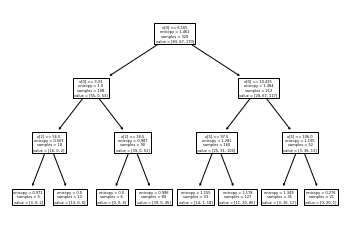

In [16]:
#plotting the decision tree
tree.plot_tree(model)

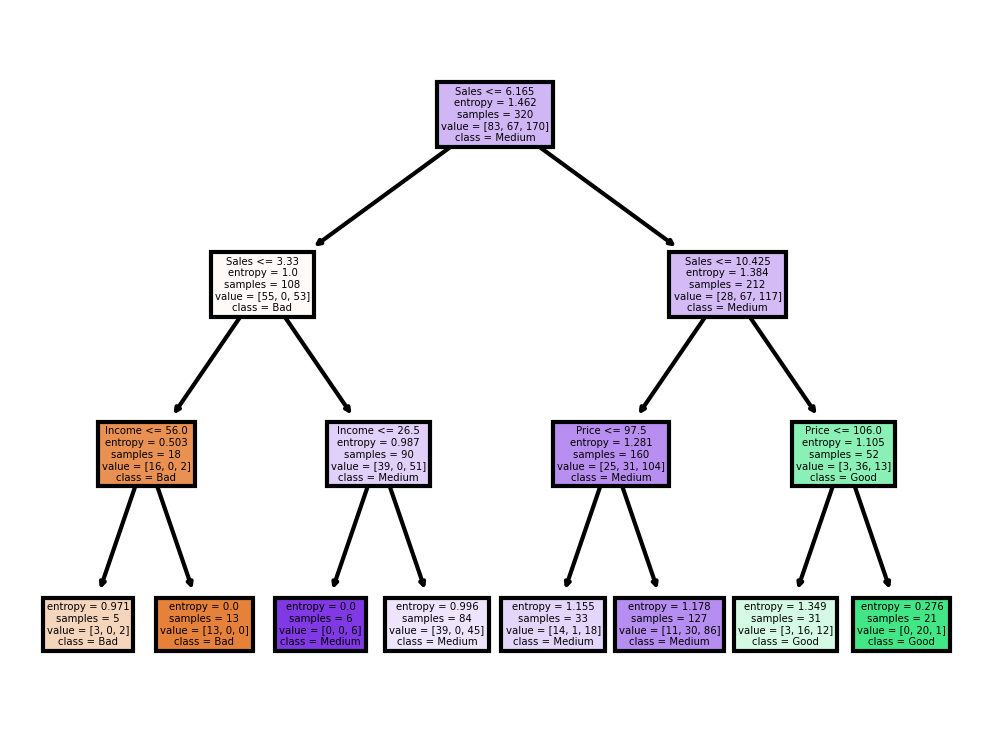

In [32]:
fn=['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US']

cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [33]:
#prediction on testing dataset
prediction=model.predict(x_test)
pd.Series(prediction).value_counts()

2    63
1    13
0     4
dtype: int64

In [34]:
prediction

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [35]:
# getting the two way table to understand the correct and wrong predictions

pd.crosstab(y_test,prediction)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [36]:
np.mean(prediction==y_test)

0.625

With Gini Criteria build a Decision Tree Classifier

In [37]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [38]:
model2_gini

DecisionTreeClassifier(max_depth=5)

In [39]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [40]:
# Predicting on test data

prediction2=model.predict(x_test)

In [41]:
prediction2

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [42]:
pd.Series(prediction2).value_counts()

2    63
1    13
0     4
dtype: int64

In [43]:
np.mean(prediction2==y_test)

0.625

Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor


model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train) 

DecisionTreeRegressor()

In [50]:
# accuracy

model3.score(x_test,y_test)

-1.0087336244541483